In [1]:
#interactive example
import time
import tkinter
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


def tellme(s):
    print(s)
    plt.title(s, fontsize=16)
    plt.show()

In [ ]:
plt.clf()
plt.setp(plt.gca(), autoscale_on=False)

tellme('You will define a triangle, click to begin')

plt.waitforbuttonpress()

while True:
    pts = []
    while len(pts) < 3:
        tellme('Select 3 corners with mouse')
        pts = np.asarray(plt.ginput(3, timeout=-1))
        if len(pts) < 3:
            tellme('Too few points, starting over')
            time.sleep(1)  # Wait a second

    ph = plt.fill(pts[:, 0], pts[:, 1], 'r', lw=2)

    tellme('Happy? Key click for yes, mouse click for no')

    if plt.waitforbuttonpress():
        break

    # Get rid of fill
    for p in ph:
        p.remove()

You will define a triangle, click to begin
Select 3 corners with mouse
Happy? Key click for yes, mouse click for no


In [ ]:
# Define a nice function of distance from individual pts
def f(x, y, pts):
    z = np.zeros_like(x)
    for p in pts:
        z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))
    return 1/z


X, Y = np.meshgrid(np.linspace(-1, 1, 51), np.linspace(-1, 1, 51))
Z = f(X, Y, pts)

CS = plt.contour(X, Y, Z, 20)

tellme('Use mouse to select contour label locations, middle button to finish')
CL = plt.clabel(CS, manual=True)

In [ ]:
tellme('Now do a nested zoom, click to begin')
plt.waitforbuttonpress()

while True:
    tellme('Select two corners of zoom, middle mouse button to finish')
    pts = plt.ginput(2, timeout=-1)
    if len(pts) < 2:
        break
    (x0, y0), (x1, y1) = pts
    xmin, xmax = sorted([x0, x1])
    ymin, ymax = sorted([y0, y1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

tellme('All Done!')
plt.show()

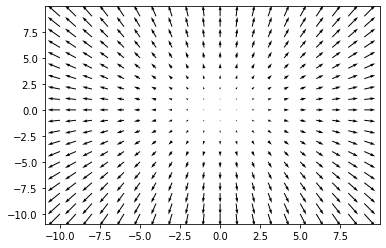

In [18]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
root.wm_title("Embedding in Tk")

def draw_vectorfield(X,Y,)

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


def on_press(event):
    print('you pressed', event.button, event.xdata, event.ydata)

fig.canvas.mpl_connect('button_press_event', on_press)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

class flow:
    def __init__(self, flow_number =0):
        self.flow_number = flow_number
class uniform(flow):
    def __init__(self, flow_number, direction=np.array([1,0]), speed =1):
        flow.__init__(self,flow_number)
        self.direction = direction
        self.speed = speed
    
class source(flow):
    def __init__(self, flow_number, position = np.array([0,0]), strength =1):
        flow.__init__(self,flow_number)
        self.position = position
        self.strength = strength
def add_uniform():
    uniform
def add_source():
    pass

button = tkinter.Button(master=root, text="Quit", command=_quit)
uniform_button = tkinter.Button(master=root, text = "Uniform Flow", command =add_uniform)
source_button = tkinter.Button(master = root, text = "source flow", command =add_source)
button.pack(side=tkinter.LEFT)
uniform_button.pack(side = tkinter.LEFT)
source_button.pack(side = tkinter.LEFT)

tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.


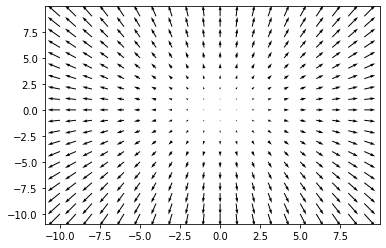

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

[[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10
  -10 -10]
 [ -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9
   -9  -9]
 [ -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8
   -8  -8]
 [ -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7
   -7  -7]
 [ -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6
   -6  -6]
 [ -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5
   -5  -5]
 [ -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4
   -4  -4]
 [ -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3
   -3  -3]
 [ -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2
   -2  -2]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1